
# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> In This Project I am using **TMDb movie dataset**.

> This data set contains information about **10,000 movies** collected from The Movie Database **(TMDb)**, including user ratings and revenue. 


### Questions for Analysis
> 1. What are the top 10 Movies based on their Adjusted Revenue ?
> 2. What are the top 10 Movies based on their Budget ?
> 3. What are the top 10 Movies based on their Popularity ?
> 4. Is there a strong correlation between budget and revenue?



In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format='{:,.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### Assesing 

In [2]:
# load data
df=pd.read_csv('tmdb-movies.csv')

In [3]:
#show first 10 row
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"
5,281957,tt1663202,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20,2015,"124,199,945.35","490,314,247.02"
6,87101,tt1340138,8.65,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80,2015,"142,599,937.26","405,355,075.68"
7,286217,tt3659388,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60,2015,"99,359,956.28","547,749,654.31"
8,211672,tt2293640,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50,2015,"68,079,970.04","1,064,192,016.80"
9,150540,tt2096673,6.33,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disn

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


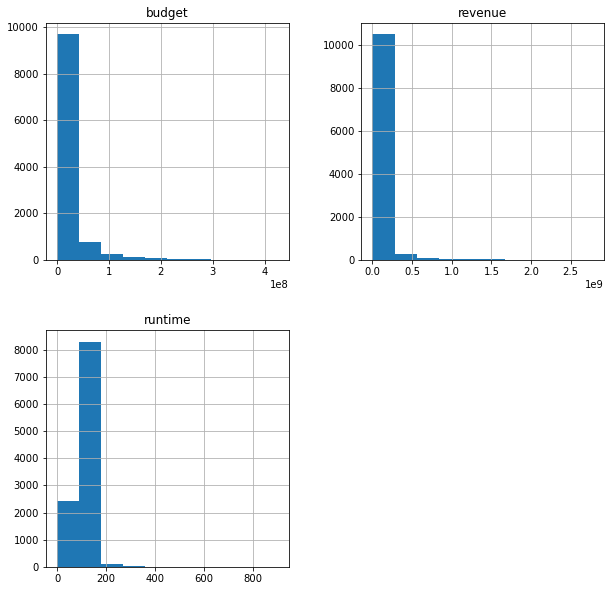

In [9]:
df[['revenue','budget','runtime']].hist(figsize=(10,10));

###### After Assesing we have:
1. one Duplicated value.
2. From info() method, [homepage, tagline, keywords, production_companies] have many missing values and should be dropped.
3. From histograms and describe() method, we have many values equal zero in [budget_adj, revenue_adj, runtime]


### Data Cleaning


##### 1.Drop Duplicated value

In [10]:
df.drop_duplicates(inplace=True)

#check
df.duplicated().sum()

0

###### 2. Drop columns [homepage, tagline, keywords, production_companies]

In [11]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], inplace=True, axis=1)

In [12]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

##### 3. Drop rows that contain zeros values in [revenue_adj, budget_adj, runtime]

In [13]:
zeros_df = df[(df.revenue_adj ==0)|(df.budget_adj==0)|(df.runtime==0)]
df.drop(zeros_df.index,inplace=True)

In [14]:
#Delete nan values in other columns
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3849 non-null   int64  
 1   imdb_id         3849 non-null   object 
 2   popularity      3849 non-null   float64
 3   budget          3849 non-null   int64  
 4   revenue         3849 non-null   int64  
 5   original_title  3849 non-null   object 
 6   cast            3849 non-null   object 
 7   director        3849 non-null   object 
 8   overview        3849 non-null   object 
 9   runtime         3849 non-null   int64  
 10  genres          3849 non-null   object 
 11  release_date    3849 non-null   object 
 12  vote_count      3849 non-null   int64  
 13  vote_average    3849 non-null   float64
 14  release_year    3849 non-null   int64  
 15  budget_adj      3849 non-null   float64
 16  revenue_adj     3849 non-null   float64
dtypes: float64(4), int64(6), object(

### Descriptive Statistics

In [16]:
#show descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,849.00","3,849.00","3,849.00","3,849.00","3,849.00","3,849.00","3,849.00","3,849.00","3,849.00","3,849.00"
mean,"39,885.15",1.19,"37,248,859.98","107,814,811.61",109.22,528.39,6.17,"2,001.26","44,293,601.64","137,231,318.62"
std,"67,248.89",1.48,"42,216,988.24","176,617,525.83",19.91,880.33,0.79,11.29,"44,813,601.29","216,201,762.38"
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37
25%,"6,072.00",0.46,"10,000,000.00","13,670,688.00",95.00,71.00,5.70,"1,995.00","13,166,226.24","18,430,229.34"
50%,"11,313.00",0.80,"24,000,000.00","44,907,260.00",106.00,205.00,6.20,"2,004.00","30,050,304.21","61,813,934.33"
75%,"38,575.00",1.37,"50,000,000.00","124,305,181.00",119.00,581.00,6.70,"2,010.00","60,767,198.03","163,411,533.62"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What are the top 10 Movies based on their Adjusted Revenue ?

In [21]:
#function for rotate x-axis text

def rotate_x_text(angel):
    for item in ax.get_xticklabels():
        item.set_rotation(angel)

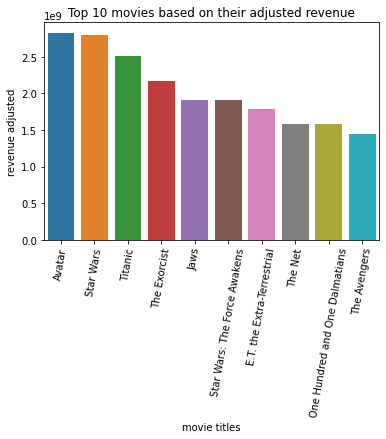

In [22]:
movies_and_revenue = df[["original_title", "revenue_adj"]]

#sorting by revenue_adj
ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)

rotate_x_text(80)
    
#plotting
ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

From this graph we get the top 10 movies based on their adjusted revenue.

Top 10: Avatar, Star Wars, Titanic...etc

### Question 2: What are the top 10 Movies based on their Budget ?

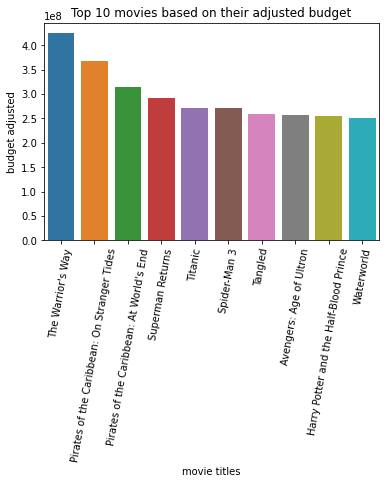

In [23]:
movies_and_budget = df[['original_title','budget_adj']]

#sorting by budget_adj
ax = sns.barplot(
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(10).original_title, 
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(10).budget_adj)

rotate_x_text(80)

#plotting
ax.set(xlabel='movie titles', ylabel='budget adjusted', title = 'Top 10 movies based on their adjusted budget')
plt.show()

From this graph we get the top 10 movies based on their budget.

Top 10: The Warriors Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean:At World's End...etc

### Question 3: What are the top 10 Movies based on their Popularity ?

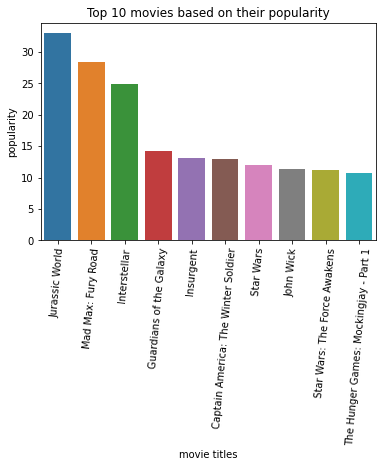

In [24]:
movies_and_popularity = df[['original_title','popularity']]

#sorting by popularity
ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(10).popularity)

rotate_x_text(85)

#plotting
ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 10 movies based on their popularity')
plt.show()

From this graph we get the top 10 movies based on their popularity.

Top 10: Jurassic World, Mad Max: Fury Road, Intersteller, Gurdians of the Galaxy...etc

### Question 4: Is there a strong correlation between budget and revenue?

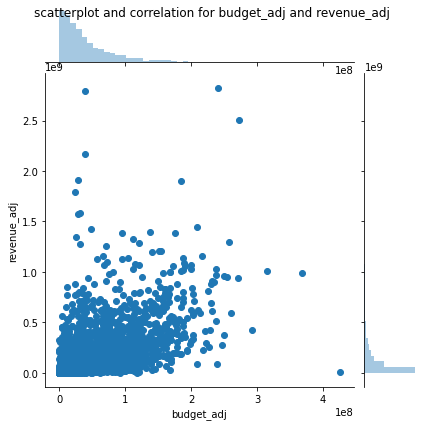

In [25]:
correlation_df = df[['revenue_adj', 'budget_adj']]

fig1 = sns.jointplot(x = "budget_adj", y = "revenue_adj", kind = "scatter", data = correlation_df)
fig1.fig.suptitle('scatterplot and correlation for budget_adj and revenue_adj');

From this Scatter Plot, we have a positive relation between budget and revenue.

<a id='conclusions'></a>
## Conclusions

I came out with some interesting fidings about movies.

#### In the first section I'm importing necessary libraries and loading the data. Showing some properties of the data using info() methods and showing some descriptive statistics using describe() method. I found that:
> 1. one Duplicated value.
> 2. From info() method, [homepage, tagline, keywords, production_companies] have many missing values and should be dropped.
> 3. From histograms and describe() method, we have many values equal zero in [budget_adj, revenue_adj, runtime]

#### In the second section I'm cleaning the data by doing this:
> 1. Drop Duplicated value.
> 2. Drop columns [homepage, tagline, keywords, production_companies]
> 3. Drop rows that contain zeros values in [revenue_adj, budget_adj, runtime]

#### In the third section, I'm answered some questions by analysis:

> #### 1. What are the top 10 Movies based on their Adjusted Revenue ?
>> **Top 10:** Avatar, Star Wars, Titanic, The Exorcist, Jaws,..etc

> #### 2. What are the top 10 Movies based on their Budget ?
>> **Top 10:** The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean:At World's End, Superman Returns,..etc

> #### 3. What are the top 10 Movies based on their Popularity ?
>> **Top 10:** Jurassic World, Mad Max: Fury Road, Intersteller, Gurdians of the Galaxy,..etc

> #### 4. Is there a strong correlation between budget and revenue?
>> There is a positive relation between budget and revenue.

## Limitations
> 1. Dropping the rows with missing values affected the overall analysis.

> 2. The budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produced in.

> 3. We are not sure if the data provided to us is completely corect and up-to-date.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0